## Hypothesis

Making a guess (not wild guess) based on assumption without scientific proof or Explaining the situation based on reasonable assumptions.


            Null Hypothesis = Ho => Decisions always leads to status quo. Current status/assumption doesn't change
            
            Alternate Hypothesis = Ha > Decisions leads to opposite of Ho

### One tail and Two tail tests

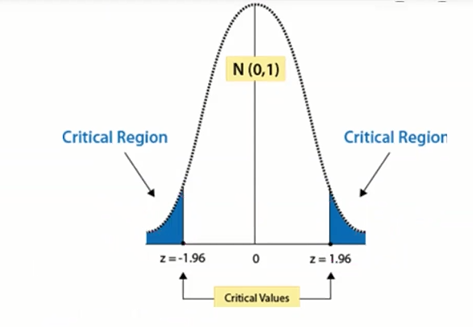  

### One tail test

#### Left tail test

- Example - Car mileage test.

**Ho** - All our cars average mileage is greater than 25KMPL

**Ha** - Average mileage is less than 25 KMPL

**_Left-tailed test:-_** The alternative hypothesis contains the **"<"** sign

#### Right Tail test

**Example** :- New method will reduce delivery time

- **Ho** Our new home delivery method reduce delivery time
- **Ha** New method will increase the delivery time

### Two tail test

Example - Difference in car mileage when drove by two different persons

**Two tailed test**: The alternative hypothesis containes the "$\neq$" sign

### Problem

A car manufacturing company claims mileage of all their cars is **52 KMPL**.The population standard devation is known from the 
past experience to be **1.5 KMPL**. A car rental company wants to test the null hypothesis that the average mileage is at least **25 KMPL**. Car rental representative drove **30 cars** (samples) of the same company and recorded each car mileage. The average mileage of the sample turned  out to be **24.2 KMPL**.


- Test of the null hypothesis ?


**(HO) Null Hypothesis >= 25**

**(H1) Alternative Hypothesis<25**

In [1]:
import numpy as np

mean = 25

sample_mean = 24.2

std = 1.5

n = 30

In [2]:
z = (sample_mean - mean)/ (std/np.sqrt(30))
z

# Below Z score need to check in the Z-table to get the p-value

-2.921186973360889

###### Using statistics tolls

In [3]:
import scipy.stats as st
import numpy as np
p_value = st.norm.cdf(sample_mean,loc=mean,scale=std/np.sqrt(30))
p_value

0.0017435024460706768

#### important points

- Standard alpha level=0.05
- if p-value is < 0.05 then we reject null hypothesis(Ho)
- if p-value is > 0.05 then we failed to reject the Ho


**Conclusion** As the p-value is less than alpha(0.05),We reject the null hypothesis (mileage >= 25 KMPL),Which also means that, all the cars do not give 25 mileage so rental company will not the buy the cars.

#### Type 1 Error - If Ho is True and You reject  Ho

In our example, if averrage car mileage is really 25 or > 25 KMPL and rental agency rejects it. it's Type 1 error.

#### Type 2 Error - if Ho is False and you failed to reject Ho

if average car mileage is really < 25 KMPL but rental agency buying cars (failed to reject Ho), it's Type2 error.

## Statistical Tolls

 _1. ttest or student's ttest_
 
 _2. ANOVA_
 
 _3. chi-square_

### ttest

- One sample ttest

- Two sample ttest

conduct ttest when standard deviation is not known

https://github.com/training-ml/files


In [14]:
import pandas as pd
hyp = pd.read_csv('https://raw.githubusercontent.com/AnviAyu123/class-1/main/Hypothesis%20ttest.csv')
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


A Teacher want to teach students for a competative exams.she collected sample of students marks from different schools and based on her past experiens she believes that, these type of students will score more than 60 marks in the exams.Now she want to conduct hypothesis test on the marks.

Ho = mu >=60

Ha = mu < 60

In [15]:
hyp['Math1'].mean()

52.645

In [16]:
alpha = .05
xbar = 52.645
mu = 60

# 1  sample t test

In [18]:
import scipy.stats as st

In [20]:
# Since we are conducting test for one sample we will go for 1 sample t test
st.ttest_1samp(hyp.Math1,mu)

Ttest_1sampResult(statistic=-11.102736525713398, pvalue=1.3339158110547646e-22)

#### When you run ttest, We get  2 values 1. t statistics score and 2. pvalue for two tail     pvalue/2


In [21]:
# lets write this way
s,p = st.ttest_1samp(hyp.Math1,mu)

In [22]:
s

-11.102736525713398

In [23]:
p

1.3339158110547646e-22

## 2. sample ttest

### Independent sample

#### palred sample

In [24]:
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [25]:
hyp['Gender'].value_counts()

1    109
0     91
Name: Gender, dtype: int64

In [26]:
# How to subset the data on Gender
hyp[hyp['Gender']==1].Math1.head()

1     53
92    65
93    52
94    46
95    61
Name: Math1, dtype: int64

In [28]:
# Independent sample
t,p=st.ttest_ind(hyp[hyp['Gender']==1].Math1,hyp[hyp['Gender']==0].Math1)

In [29]:
p

0.6800544974232143

In [30]:
# Paired Sample
t,p=st.ttest_rel(hyp.Math1,hyp.Math2)

In [31]:
p

0.17676525605507354

There is an another test which is more than 2 sample t test.But for each t test we allow 5% error (alpha),So if we conduct more than 2 sample t test we are adding 5% more error for each extra sample t test.In order to resolve this problem we go for **ANOVA** test.i.e.**AN**alysis **O**f **VA**riance.